In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
#classificators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [4]:
scaler = StandardScaler()
label = LabelEncoder()

In [5]:
location='RUASVII_SEG_RANDSAMP.xlsx'
df=pd.read_excel(location)

In [6]:
df2=df.copy()

In [25]:
df=df2.copy()

In [7]:
df.columns[:100]

Index(['Customer', 'Category', 'Client_Category', 'SEGMENT', 'Client_Type',
       'Age', 'AgeGroup', 'Gender', 'Married', 'BUNDLECODE', 'HomeBranch',
       'Branch_HB', 'Hub_HB', 'ClientBranch', 'Branch_C', 'Hub_C',
       'First_Account', 'COUNT_of_AccountN', 'SUM_BALANCE', 'IS_CARD',
       'COUNT_CARD', 'IS_CC', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'IS_DC',
       'COUNT_DC_Main', 'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE',
       'Count_CARLOAN', 'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN',
       'COUNT_TD', 'SUM_TD', 'DATE_LAST_SESSION', 'SESS_1M_COUNT',
       'SESS_3M_COUNT', 'SESS_6M_COUNT', 'SESS_12M_COUNT', 'COUNT_YM_12m',
       'A12', 'A6', 'A3', 'A1', 'Active_months', 'COUNT_12', 'SumR_12',
       'COUNT_6', 'SumR_6', 'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1', 'Last_A',
       'First_TrRC', 'Second_TrRC', 'A12RC', 'A6RC', 'A3RC', 'A1RC',
       'Active_months_RC', 'COUNT_12RC', 'SumR_12RC', 'COUNT_6RC', 'SumR_6RC',
       'COUNT_3RC', 'SumR_3RC', 'COUNT_1RC',

In [26]:
#заменяем пропуски на нули
torep=['Customer',     'Age',  'First_Account', 'COUNT_of_AccountN', 'SUM_BALANCE', 'IS_CARD',
       'COUNT_CARD', 'IS_CC', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'IS_DC',
       'COUNT_DC_Main', 'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE',
       'Count_CARLOAN', 'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN',
       'COUNT_TD', 'SUM_TD', 'DATE_LAST_SESSION', 'SESS_1M_COUNT',
       'SESS_3M_COUNT', 'SESS_6M_COUNT', 'SESS_12M_COUNT', 'COUNT_YM_12m',
       'A12', 'A6', 'A3', 'A1', 'Active_months', 'COUNT_12', 'SumR_12',
       'COUNT_6', 'SumR_6', 'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1', 'Last_A',
       'First_TrRC', 'Second_TrRC', 'A12RC', 'A6RC', 'A3RC', 'A1RC',
       'Active_months_RC', 'COUNT_12RC', 'SumR_12RC', 'COUNT_6RC', 'SumR_6RC',
       'COUNT_3RC', 'SumR_3RC', 'COUNT_1RC', 'SumR_1RC', 'Last_A_RC', 'A12ATM',
       'A3ATM', 'A1ATM', 'Active_months_ATM', 'COUNT_12ATM', 'SumR_12ATM',
       'COUNT_3ATM', 'SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS',
       'A1POS', 'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br', 'SumR_3Br',
       'COUNT_1Br', 'SumR_1Br', 'CountTr', 'SumTr', 'CountTr_Vyvod_', 'SumTrVyvod',
       'Part_CountTrVyvod', 'Part_SumTrVyvod', 'SMS_ALERTING',
       'TR_MB', 'TR_IB', 'PIN1_D', 'sum_PINk', 'PINk1_D', 'PINk_Last_D',
       'PINk_Last_Channel', 'LOG1_D', 'SESS_D_First', 'SESS_D_Last', 'IS_RCAS',
       'AUTH_FIRST_D', 'IS_CA', 'IS_B1000', 'IS_B2500', 'IS_TD', 'IS_CREDIT',
       'IS_SMS_ALERT', 'IS_PIN', '#_MWS_Добавление Push ID',
       '#_MWS_Оплата услуг', '#_MWS_перевод на чужую карту Рай',
       '#_RC_Открытие депозита', '#_RC_перевод на карту другого ба',
       '#_RC_Оплата услуг', '#_RC_перевод средств между своим',
       '#_MWS_Внутренние Переводы/Конвер', '#_MWS_Перевод с карты на карту',
       '#_MWS_Рублевые переводы', '#_MWS_Заявление на ЧДП кредита У',
       '#_MWS_перевод на карту другого б', '#_RC_Рублевые переводы',
       '#_RC_Перевод с карты другого бан', '#_RC_Заявление на ЧДП кредита Ум',
       '#_RC_Перевод с карты на карту', '#_RC_Частичное снятие депозита',
       '#_RC_Рублевый перевод по номеру', '#_MWS_Перевод с карты другого ба',
       '#_RC_Заявление на полное досрочн', '#_RC_Внутренние Переводы/Конверт',
       '#_RC_перевод с зп карты на карту', '#_RC_Изменение контактного телеф',
       '#_RC_перевод на чужую карту Райф', '#_RC_Изменение телефона для СМС-',
       '#_MWS_Изменение телефона для SMS', '#_RC_Платежи в бюджет (РФ)',
       '#_RC_Подтверждение входа однораз', '#_RC_Изменение лимитов по карте',
       '#_RC_Рублёвый перевод со счёта И', '#_RC_Пополнение депозита',
       '#_MWS_Пополнение депозита', '#_RC_Валютные переводы за рубеж',
       '#_RC_Оплата паев', '#_MWS_перевод средств между свои',
       '#_RC_Создание нового счета', '#_MWS_Частичное снятие депозита',
       '#_MWS_Заявление на полное досроч', '#_MWS_Платежи в бюджет (РФ)',
       '#_RCP_Рублевые переводы', '#_MBG_Оплата услуг',
       '#_RC_Создание/изменение поездки', '#_RC_Подписанный шаблон на оплат',
       '#_MWS_Оплата паев', '#_RC_Изменение телефона для SMS',
       '#_MWS_Открытие депозита', '#_RC_Валютные переводы РФ',
       '#_RC_Подписание пакета документо', '#_MWS_Создание нового счета',
       '#_RC_Создание доверенности на пр', '#_RC_Рублевый перевод по e-mail',
       '#_RC_Создание доверенности на ис', '#_MWS_перевод с зп карты на карт',
       '#_MWS_Рублевый перевод по номеру', '#_RCP_Перевод с карты на карту',
       '#_RC_Подписанный шаблон на рубле', '#_RCP_Внутренние Переводы/Конвер',
       '#_RCP_Валютные переводы за рубеж', '#_RCP_перевод средств между свои',
       '#_RCP_Заявление на ЧДП кредита У', '#_RCP_Заявление на полное досроч',
       '#_RCP_Оплата услуг', '#_RCP_Платежи в бюджет (РФ)',
       '#_RCP_Валютные переводы РФ', '#_RCP_Частичное снятие депозита',
       '#_RCP_перевод на карту другого б', '#_RC_Подключение СМС-ОТР',
       '#_RCP_Открытие депозита', 'S_MWS_Добавление Push ID',
       'S_MWS_Оплата услуг', 'S_MWS_перевод на чужую карту Рай',
       'S_RC_Открытие депозита','S_RC_перевод на карту другого ба', 'S_RC_Оплата услуг',
       'S_RC_перевод средств между своим', 'S_MWS_Внутренние Переводы/Конвер',
       'S_MWS_Перевод с карты на карту', 'S_MWS_Рублевые переводы',
       'S_MWS_Заявление на ЧДП кредита У', 'S_MWS_перевод на карту другого б',
       'S_RC_Рублевые переводы', 'S_RC_Перевод с карты другого бан',
       'S_RC_Заявление на ЧДП кредита Ум', 'S_RC_Перевод с карты на карту',
       'S_RC_Частичное снятие депозита', 'S_RC_Рублевый перевод по номеру',
       'S_MWS_Перевод с карты другого ба', 'S_RC_Заявление на полное досрочн',
       'S_RC_Внутренние Переводы/Конверт', 'S_RC_перевод с зп карты на карту',
       'S_RC_Изменение контактного телеф', 'S_RC_перевод на чужую карту Райф',
       'S_RC_Изменение телефона для СМС-', 'S_MWS_Изменение телефона для SMS',
       'S_RC_Платежи в бюджет (РФ)', 'S_RC_Подтверждение входа однораз',
       'S_RC_Изменение лимитов по карте', 'S_RC_Рублёвый перевод со счёта И',
       'S_RC_Пополнение депозита', 'S_MWS_Пополнение депозита',
       'S_RC_Валютные переводы за рубеж', 'S_RC_Оплата паев',
       'S_MWS_перевод средств между свои', 'S_RC_Создание нового счета',
       'S_MWS_Частичное снятие депозита', 'S_MWS_Заявление на полное досроч',
       'S_MWS_Платежи в бюджет (РФ)', 'S_RCP_Рублевые переводы',
       'S_MBG_Оплата услуг', 'S_RC_Создание/изменение поездки',
       'S_RC_Подписанный шаблон на оплат', 'S_MWS_Оплата паев',
       'S_RC_Изменение телефона для SMS', 'S_MWS_Открытие депозита',
       'S_RC_Валютные переводы РФ', 'S_RC_Подписание пакета документо',
       'S_MWS_Создание нового счета', 'S_RC_Создание доверенности на пр',
       'S_RC_Рублевый перевод по e-mail', 'S_RC_Создание доверенности на ис',
       'S_MWS_перевод с зп карты на карт', 'S_MWS_Рублевый перевод по номеру',
       'S_RCP_Перевод с карты на карту', 'S_RC_Подписанный шаблон на рубле',
       'S_RCP_Внутренние Переводы/Конвер', 'S_RCP_Валютные переводы за рубеж',
       'S_RCP_перевод средств между свои', 'S_RCP_Заявление на ЧДП кредита У',
       'S_RCP_Заявление на полное досроч', 'S_RCP_Оплата услуг',
       'S_RCP_Платежи в бюджет (РФ)', 'S_RCP_Валютные переводы РФ',
       'S_RCP_Частичное снятие депозита', 'S_RCP_перевод на карту другого б',
       'S_RC_Подключение СМС-ОТР', 'S_RCP_Открытие депозита', 'SUM_ALL',
       '/_MWS_Добавление Push ID', '/_MWS_Оплата услуг',
       '/_MWS_перевод на чужую карту Рай', '/_RC_Открытие депозита',
       '/_RC_перевод на карту другого ба', '/_RC_Оплата услуг',
       '/_RC_перевод средств между своим', '/_MWS_Внутренние Переводы/Конвер',
       '/_MWS_Перевод с карты на карту', '/_MWS_Рублевые переводы',
       '/_MWS_Заявление на ЧДП кредита У', '/_MWS_перевод на карту другого б',
       '/_RC_Рублевые переводы', '/_RC_Перевод с карты другого бан',
       '/_RC_Заявление на ЧДП кредита Ум', '/_RC_Перевод с карты на карту',
       '/_RC_Частичное снятие депозита', '/_RC_Рублевый перевод по номеру',
       '/_MWS_Перевод с карты другого ба', '/_RC_Заявление на полное досрочн',
       '/_RC_Внутренние Переводы/Конверт', '/_RC_перевод с зп карты на карту',
       '/_RC_Изменение контактного телеф', '/_RC_перевод на чужую карту Райф',
       '/_RC_Изменение телефона для СМС-', '/_MWS_Изменение телефона для SMS',
       '/_RC_Платежи в бюджет (РФ)', '/_RC_Подтверждение входа однораз',
       '/_RC_Изменение лимитов по карте', '/_RC_Рублёвый перевод со счёта И',
       '/_RC_Пополнение депозита', '/_MWS_Пополнение депозита',
       '/_RC_Валютные переводы за рубеж', '/_RC_Оплата паев',
       '/_MWS_перевод средств между свои','/_RC_Создание нового счета', '/_MWS_Частичное снятие депозита',
       '/_MWS_Заявление на полное досроч', '/_MWS_Платежи в бюджет (РФ)',
       '/_RCP_Рублевые переводы', '/_MBG_Оплата услуг',
       '/_RC_Создание/изменение поездки', '/_RC_Подписанный шаблон на оплат',
       '/_MWS_Оплата паев', '/_RC_Изменение телефона для SMS',
       '/_MWS_Открытие депозита', '/_RC_Валютные переводы РФ',
       '/_RC_Подписание пакета документо', '/_MWS_Создание нового счета',
       '/_RC_Создание доверенности на пр', '/_RC_Рублевый перевод по e-mail',
       '/_RC_Создание доверенности на ис', '/_MWS_перевод с зп карты на карт',
       '/_MWS_Рублевый перевод по номеру', '/_RCP_Перевод с карты на карту',
       '/_RC_Подписанный шаблон на рубле', '/_RCP_Внутренние Переводы/Конвер',
       '/_RCP_Валютные переводы за рубеж', '/_RCP_перевод средств между свои',
       '/_RCP_Заявление на ЧДП кредита У', '/_RCP_Заявление на полное досроч',
       '/_RCP_Оплата услуг', '/_RCP_Платежи в бюджет (РФ)',
       '/_RCP_Валютные переводы РФ', '/_RCP_Частичное снятие депозита',
       '/_RCP_перевод на карту другого б', '/_RC_Подключение СМС-ОТР',
       '/_RCP_Открытие депозита', 'COUNT_Comp_Mob', 'COUNT_of_Browser',
       'CNT_send_cards', 'CNT_recieve_banks', 'CNT_distinct_sums',
       'MAX_of_OP_IS_MTC', 'MAX_of_OP_IS_Beeline', 'MAX_of_OP_IS_Megafon',
       'MAX_of_OP_IS_Tele2', 'MAX_of_OP_IS_other', 'Is_second_trans']
for q in torep:
    df[q]=df[q].fillna(0) 

In [27]:
cltype=pd.get_dummies(df.Client_Type) 
df = pd.concat([df, cltype], axis=1)

In [28]:
#создаем новые фичи по датам
df['DIF_1-2Trans']=df['Second_TrRC']-df['First_TrRC']
df['DIF_1-2Trans']=df['DIF_1-2Trans'].fillna(df['DIF_1-2Trans'].mean())
df['dif_A']=df['DATE_LAST_SESSION'] - df['Last_A_RC']
df['dif_A']=df['dif_A'].fillna(df['dif_A'].mean())
df['years_acc']=df['DATE_LAST_SESSION'] - df['First_Account']
df['years_acc']=df['years_acc'].fillna(df['years_acc'].mean())
df['SESS_2M_COUNT']=df['SESS_3M_COUNT'] - df['SESS_1M_COUNT']
df['DIF_1-2Trans']=df['DIF_1-2Trans'].apply(lambda x: x.days)
df['dif_A']=df['dif_A'].apply(lambda x: x.days)
df['years_acc']=df['years_acc'].apply(lambda x: x.days)

to_drop=['Client_Type','IS_CARD', 'IS_DC', 'IS_CC', 'Customer', 'Last_A', 'Last_A_RC','First_Account','DATE_LAST_SESSION','First_TrRC','Second_TrRC']
df=df.drop(to_drop,axis=1)  

In [29]:
df.BUNDLECODE=df.BUNDLECODE.fillna('NONE')  
df.BUNDLECODE=label.fit_transform(df.BUNDLECODE)
df.Married=df.Married.fillna('nan')
df.Married=label.fit_transform(df.Married)
df.Gender=df.Gender.fillna('nan')
df.Gender = label.fit_transform(df.Gender)
df.SEGMENT=df.SEGMENT.fillna('NONE')
df.SEGMENT=label.fit_transform(df.SEGMENT)
df.Вывод=df.Вывод.fillna('no info')
df.Вывод=label.fit_transform(df.Вывод)
df.Hub_HB=df.Hub_HB.fillna('nan')
df.Hub_HB=label.fit_transform(df.Hub_HB)
df.AgeGroup=df.AgeGroup.fillna('nan')
df.AgeGroup=label.fit_transform(df.AgeGroup)
df.SMS_ALERTING=df.SMS_ALERTING.fillna('nan')
df.SMS_ALERTING = label.fit_transform(df.SMS_ALERTING)
df.Client_Category=df.Client_Category.fillna('nan')
#df.Client_Type=df.Client_Type.fillna('nan')
df.Client_Category=label.fit_transform(df.Client_Category)
#df.Client_Type=label.fit_transform(df.Client_Type)
df.Category=df.Category.fillna('nan')   
df.Category=label.fit_transform(df.Category)
df.HomeBranch=df.HomeBranch.fillna('nan')   
df.HomeBranch=label.fit_transform(df.HomeBranch)
df.Branch_HB=df.Branch_HB.fillna('nan')   
df.Branch_HB=label.fit_transform(df.Branch_HB)
df.ClientBranch=df.ClientBranch.fillna('nan')   
df.ClientBranch=label.fit_transform(df.ClientBranch)
df.Branch_C=df.Branch_C.fillna('nan')   
df.Branch_C=label.fit_transform(df.Branch_C)
df.Hub_C=df.Hub_C.fillna('nan')   
df.Hub_C=label.fit_transform(df.Hub_C)
df.Вывод=df.Вывод.fillna('nan')   
df.Вывод=label.fit_transform(df.Вывод)
df.Branch_C=df.Branch_C.fillna('nan')   
df.Branch_C=label.fit_transform(df.Branch_C)
df.Hub_C=df.Hub_C.fillna('nan')   
df.Hub_C=label.fit_transform(df.Hub_C)

In [ ]:
df1=df.copy()

In [12]:
to_drop=['Category', 'Client_Category', 'SEGMENT', 'Age', 'AgeGroup',
       'Gender', 'Married', 'BUNDLECODE', 'HomeBranch', 'Branch_HB', 'Hub_HB',
       'ClientBranch', 'Branch_C', 'Hub_C', 'COUNT_of_AccountN', 'SUM_BALANCE',
       'COUNT_CARD', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'COUNT_DC_Main',
       'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE', 'Count_CARLOAN',
       'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN', 'COUNT_TD', 'SUM_TD',
       'A12', 'A6', 'A3',
       'A1', 'Active_months', 'COUNT_12', 'SumR_12', 'COUNT_6', 'SumR_6',
       'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1',       
      'A12ATM', 'A3ATM', 'A1ATM', 'Active_months_ATM',
       'COUNT_12ATM', 'SumR_12ATM', 'COUNT_3ATM','SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS', 'A1POS',
       'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br', 'SumR_3Br',
       'COUNT_1Br', 'SumR_1Br', 'CountTr', 'SumTr', 'CountTr_Vyvod_',
       'SumTrVyvod', 'Part_CountTrVyvod', 'Part_SumTrVyvod', 'Вывод',
       'SMS_ALERTING', 'IS_RCAS', 'Branch_C', 'Hub_C', 'IS_CA', 'IS_B1000',
       'IS_TD', 'IS_CREDIT', 'IS_SMS_ALERT',  'Employee', 'Payroll', 'Walk-in', 'DIF_1-2Trans', 'dif_A', 'years_acc',
         'PIN1_D', 'PINk1_D','PINk_Last_D', 'PINk_Last_Channel','LOG1_D', 'SESS_D_First', 'SESS_D_Last','AUTH_FIRST_D'
     ]
df=df.drop(to_drop,axis=1)  

# Сегментируем

Как ни странно, k_means++ показал результат лучше других методов (дбскана, иерархической и тд), к тому же быстрее работает и отлично разделяет классы, оставляем его

In [ ]:
X=scaler.fit_transform(df)
X=pd.DataFrame(X)

In [ ]:
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=1).fit(X)

In [19]:
labels=kmeans.labels_

In [18]:
pd.Series(kmeans.labels_).value_counts()

0     29916
4     28427
3     18573
17     7117
9      6572
12     6023
2      1184
14      826
8       530
5       353
1       325
19       75
16       53
18       10
15        9
7         2
6         2
13        1
11        1
10        1
dtype: int64

######################################Пролистать этот раздел##################################################

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=120)
df1=pca.fit_transform(df)

In [56]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

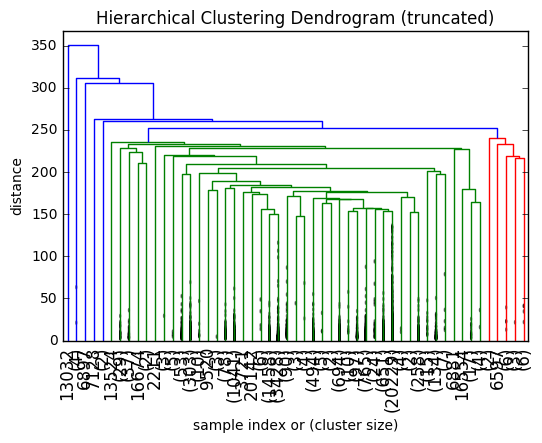

In [57]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=53,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [82]:
def cluster_labels(X, threshold):
    Z = linkage(X, method='ward')
    h_labels=fcluster(Z, threshold , criterion='distance')
    final=df.copy()
    final['final_labels']=h_labels
    unique_labels=final['final_labels'].value_counts().index.tolist()
    final.final_labels.replace(unique_labels,[i+1 for i in range(len(unique_labels))],inplace=True)
    return final

In [ ]:
Z = linkage(X, method='ward')

In [16]:
h_labels=fcluster(Z, 130 , criterion='distance')

############################################################################################################

## Создаем конечный файл

In [21]:
final=pd.concat([df, pd.Series(kmeans.labels_)], axis=1)

In [41]:
final.head()

,SESS_1M_COUNT,SESS_3M_COUNT,SESS_6M_COUNT,SESS_12M_COUNT,COUNT_YM_12m,A12RC,A6RC,A3RC,A1RC,Active_months_RC,...,CNT_recieve_banks,CNT_distinct_sums,MAX_of_OP_IS_MTC,MAX_of_OP_IS_Beeline,MAX_of_OP_IS_Megafon,MAX_of_OP_IS_Tele2,MAX_of_OP_IS_other,Is_second_trans,SESS_2M_COUNT,0
0,11.0,22.0,45.0,176.0,12.0,1,1,1,1,12,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1,11.0,40
1,13.0,36.0,75.0,161.0,12.0,1,1,1,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,23.0,40
2,23.0,92.0,92.0,95.0,5.0,1,1,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,69.0,19
3,17.0,24.0,24.0,24.0,2.0,1,1,1,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,7.0,46
4,8.0,23.0,36.0,54.0,12.0,1,1,1,1,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,15.0,40


In [37]:
final.to_csv('final.csv')

In [ ]:
writer = ExcelWriter('final_kmeans1.xlsx')
final.to_excel(writer)
writer.save() 

# Предсказываем лейбл (мультиклассовая классификация) 

## Предобработка

In [24]:
Customer=df2.Customer

,Customer,Category,Client_Category,SEGMENT,Client_Type,Age,AgeGroup,Gender,Married,BUNDLECODE,...,COUNT_of_Browser,CNT_send_cards,CNT_recieve_banks,CNT_distinct_sums,MAX_of_OP_IS_MTC,MAX_of_OP_IS_Beeline,MAX_of_OP_IS_Megafon,MAX_of_OP_IS_Tele2,MAX_of_OP_IS_other,Is_second_trans
0,001011,50,PI,MassAffluent,Payroll,33,30-34,M,N,STAN,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
1,001191,70,PI,MassAffluent,Walk-in,46,45-49,F,Y,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,001416,50,PI,Mass,Payroll,29,25-29,M,Y,NONE,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1
3,001446,50,PI,MassAffluent,Payroll,35,35-39,F,NaN,GOLD,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0
4,001546,50,PI,Affluent,Payroll,32,30-34,F,N,NONE,...,1.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1


In [57]:
to_drop=['Category', 'Client_Category', 'SEGMENT', 'Age', 'AgeGroup',
       'Gender', 'Married', 'BUNDLECODE', 'HomeBranch', 'Branch_HB', 'Hub_HB',
       'ClientBranch', 'Branch_C', 'Hub_C', 'COUNT_of_AccountN', 'SUM_BALANCE',
       'COUNT_CARD', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'COUNT_DC_Main',
       'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE', 'Count_CARLOAN',
       'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN', 'COUNT_TD', 'SUM_TD',
       'A12', 'A6', 'A3', 'A1', 'Active_months', 'COUNT_12', 'SumR_12', 'COUNT_6', 'SumR_6',
       'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1',       
      'A12ATM', 'A3ATM', 'A1ATM', 'Active_months_ATM',
       'COUNT_12ATM', 'SumR_12ATM', 'COUNT_3ATM','SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS', 'A1POS',
       'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br', 'SumR_3Br',
       'COUNT_1Br', 'SumR_1Br', 'CountTr', 'SumTr', 'CountTr_Vyvod_',
       'SumTrVyvod', 'Part_CountTrVyvod', 'Part_SumTrVyvod', 'Вывод',
       'SMS_ALERTING', 'IS_RCAS', 'Branch_C', 'Hub_C', 'IS_CA', 'IS_B1000',
       'IS_TD', 'IS_CREDIT', 'IS_SMS_ALERT',  'Employee', 'Payroll', 'Walk-in', 'dif_A']
drop=set(df.columns)-set(to_drop)

In [ ]:
df=df.drop(drop,axis=1)  

In [65]:
df.head().dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [91]:
Train=pd.concat([df, final.ix[:, -1]], axis=1)
q=list(Train.columns)[:-1].append('Label')
Train.columns=q

In [116]:
Train.columns

Index(['Category', 'Client_Category', 'SEGMENT', 'Age', 'AgeGroup', 'Gender',
       'Married', 'BUNDLECODE', 'HomeBranch', 'Branch_HB', 'Hub_HB',
       'ClientBranch', 'Branch_C', 'Hub_C', 'COUNT_of_AccountN', 'SUM_BALANCE',
       'COUNT_CARD', 'COUNT_CC_Main', 'COUNT_CC_Suppl', 'COUNT_DC_Main',
       'COUNT_DC_Suppl', 'Count_UNSECURED', 'Count_MORTGAGE', 'Count_CARLOAN',
       'Sum_UNSECURED', 'Sum_MORTGAGE', 'Sum_CARLOAN', 'COUNT_TD', 'SUM_TD',
       'A12', 'A6', 'A3', 'A1', 'Active_months', 'COUNT_12', 'SumR_12',
       'COUNT_6', 'SumR_6', 'COUNT_3', 'SumR_3', 'COUNT_1', 'SumR_1', 'A12ATM',
       'A3ATM', 'A1ATM', 'Active_months_ATM', 'COUNT_12ATM', 'SumR_12ATM',
       'COUNT_3ATM', 'SumR_3ATM', 'COUNT_1ATM', 'SumR_1ATM', 'A12POS', 'A3POS',
       'A1POS', 'Active_months_POS', 'COUNT_12POS', 'SumR_12POS', 'COUNT_3POS',
       'SumR_3POS', 'COUNT_1POS', 'SumR_1POS', 'A12Br', 'A3Br', 'A1Br',
       'Active_months_Br', 'COUNT_12Br', 'SumR_12Br', 'COUNT_3Br', 'SumR_3Br',
      

In [162]:
X=pd.concat([Train[Train['Label']==0],Train[Train['Label']==4],Train[Train['Label']==3],
           Train[Train['Label']==17],Train[Train['Label']==9],Train[Train['Label']==12],
           Train[Train['Label']==8],Train[Train['Label']==14],Train[Train['Label']==2]])

In [163]:
X.isnull().values.any()

False

In [ ]:
X[X['Label']==0]

In [164]:
Y=X.Label
X=X.drop('Label', axis=1)

In [165]:
X=scaler.fit_transform(X)
X=pd.DataFrame(X)

In [166]:
X.columns=Train.columns[:-1]

## Модель

In [178]:
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score,mean_squared_error,auc,precision_recall_curve,label_ranking_average_precision_score
import sklearn.metrics
#classificators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [190]:
clf = RandomForestClassifier(random_state=0,class_weight="balanced")
tuned_parameters = [{'min_samples_split':np.arange(1, 4, 1)},
                     {'n_estimators':np.arange(5, 25, 5)},
                      {'max_depth':np.arange(1, 6, 1)}]
gs = GridSearchCV(clf, tuned_parameters, cv=5,scoring="f1_weighted" ,verbose=True)

In [191]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/c

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': array([1, 2, 3])}, {'n_estimators': array([ 5, 10, 15, 20])}, {'max_depth': array([1, 2, 3, 4, 5])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=True)

In [173]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [192]:
preds_train=pd.Series(gs.predict(X_train))
preds_train.value_counts()[:15]

0     20085
4     19153
3     12317
17     4786
9      4346
12     4063
2       806
14      539
8       347
dtype: int64

Трейн

In [194]:
print ("MSE: ", mean_squared_error(y_train, preds_train))
print ("F-мера: ", f1_score(y_train, preds_train))

MSE:  0.0774961620662
F-мера:  0.999157388196


/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Тест

In [195]:
print ("MSE: ",mean_squared_error(y_test, gs.predict(X_test)))
print ("F-мера: ",f1_score(y_test, gs.predict(X_test)))

MSE:  30.0030251176
F-мера:  0.40894442999


/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
